<a href="https://colab.research.google.com/github/amankumar444/python-test/blob/master/Redcarpet_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install nsepy

In [0]:
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy import stats
from nsepy import get_history
from datetime import date
warnings.filterwarnings("ignore")
%matplotlib inline

## Adding Data Sets to the Notebook

In [0]:
#Getting Stock price data from yahoo finance using panda_datareader library
#Getting NIFTYIT Index value using nsepy library

TCS = dr.data.get_data_yahoo('TCS.NS', start = '2015-01-01', end ='2016-01-01')
INFY = dr.data.get_data_yahoo('INFY.NS', start = '2015-01-01', end ='2016-01-01')
niftyit = get_history(symbol="NIFTYIT", 
                    start=date(2015,1,1), 
                    end=date(2016,1,1),
					index=True)

# Time Series plot

## Plots using Matlab Library

### Plots for TCS, Infosys and NIFTY IT index

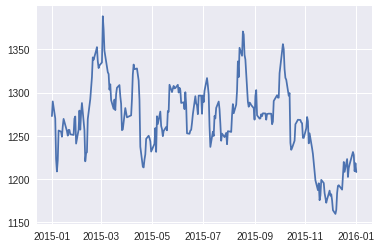

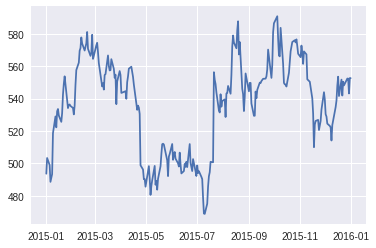

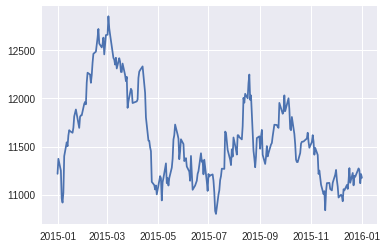

In [44]:
#Code to plot TCS, INFOSYS, NIFTY IT data set using plt(Matplot library)

plt.plot(TCS['Close'])
plt.show()
plt.plot(INFY['Close'])
plt.show()
plt.plot(niftyit['Close'])
plt.show()

# Solution of Questions Mentioned in Problem Statement

### 1. Create 4,16,....,52 week moving average(closing price) for each stock and index

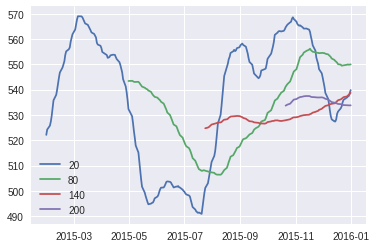

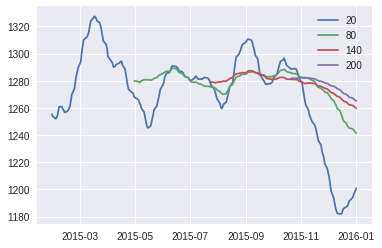

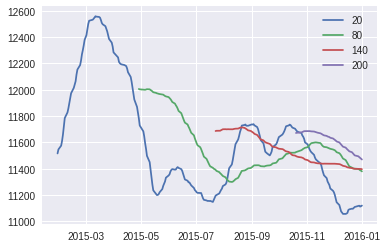

In [45]:
# for question 1, where I was supposed to calculate moving average for weeks 4(20 days), 
# 16 weeks(20+60 days), .. , 52 weeks(20+60+60+60+60-13)

def moving_avg(data):
    for i in range(20,240,60):
        data['Rolling_Mean'] = data['Close'].rolling(window = i).mean()
        plt.plot(data['Rolling_Mean'], label = i)
        plt.legend()
    plt.show()

moving_avg(INFY)
moving_avg(TCS)
moving_avg(niftyit)    

## 2. Create rolling window of size 10 on each stock/index.

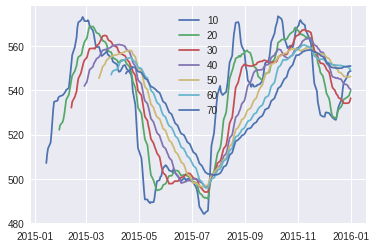

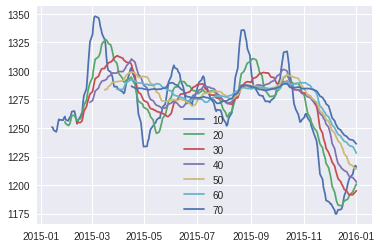

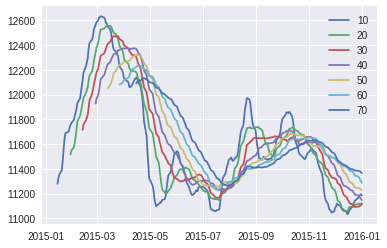

In [46]:
#Answer to the 2nd Question, where rolling window is incremented with 10 steps
#For all the stocks and index dataset.

def time_s(data):
    for i in range(10,80,10):
        data['Rolling_Mean'] = data['Close'].rolling(window = i).mean()
        plt.plot(data['Rolling_Mean'], label = i)
        plt.legend()
    plt.show()
    
time_s(INFY)
time_s(TCS)
time_s(niftyit)

## 3. Create the following dummy time series

In [0]:
'''Function to generate extra features like Volume Shocks, Price Shocks, Directions and 
   Pricing shock without volume shock.
Volume Shock = 'Vol_Shock'
Price Shock = 'Price_Shock'
Directions for Vol_Shock = 'direc_Vol_Shock'
Directions for Price_Shock = 'direc_Price_Shock'
Pricing shock without volume shock = 'PSWVS'

'''

def dummy_ts(data):
    Vol1 = data.Volume
    Close = data.Close

    data['Vol_Shock'] = np.zeros(len(data), dtype=float)
    data['Price_Shock'] = np.zeros(len(data), dtype=float)
    data['direc_Vol_Shock'] = np.zeros(len(data), dtype=float)
    data['direc_Price_Shock'] = np.zeros(len(data), dtype=float)
    data['PSWVS'] = np.zeros(len(data), dtype=float)
    for i in range(1,len(data)):
        k = ((Vol1[i]-Vol1[i-1])/Vol1[i-1])*100
        if(abs(k)>=10):
            data['Vol_Shock'][i] = 1
            if(k >0):
                data['direc_Vol_Shock'][i] = 1

    for j in range(1,len(data)):
        l = ((Close[j]-Close[j-1])/Close[j-1])*100
        if(abs(l)>=2):
            data['Price_Shock'][j] = 1
            if(l >0):
                data['direc_Price_Shock'][j] = 1
    
    for m in range(1,len(data)):
        if(data['Price_Shock'][m] == 1 and data['Vol_Shock'][m] == 0):
            data['PSWVS'][m] = 1 
            

            
dummy_ts(TCS)
dummy_ts(INFY)
dummy_ts(niftyit)

In [0]:
''' Feature extraction code for Volume Shock == 1,
    New DataFrame named N_TCS, N_INFY, N_NIFTYIT is selected, which follows above condition.
    And 2nd DataFrame named Ne_TCS, Ne_INFY, Ne_NIFTYIT is also selected:
    Condition for 2nd DataFrame is PSWVS == 1.
    
'''
N_TCS = TCS[TCS["Vol_Shock"] == 1]
N_INFY = INFY[INFY["Vol_Shock"] == 1]
N_NIFTYIT = niftyit[niftyit["Vol_Shock"] == 1]

Ne_TCS = TCS[TCS["PSWVS"] == 1]
Ne_INFY = INFY[INFY["PSWVS"] == 1]
Ne_NIFTYIT = niftyit[niftyit["PSWVS"] == 1]

# 2nd Part of Question Set

## Create timeseries plot of close prices of stocks/indices with the following features:

1.Color timeseries in simple blue color

2.Color timeseries between two volume shocks in a different color (Red)

3.Mark closing Pricing shock without volume shock to identify volumeless price movement.

In [0]:
#Plot function
def plot_(data,data1,data2):
    #fi,axes = plt.subplots(2,2, figsize=(16,10))
    plt.plot(data['Close'],color = 'blue');
    plt.show()
    plt.plot(data1['Close'], color = 'red');
    plt.show()
    plt.plot(data2['Close'], color = 'black');
    plt.show()

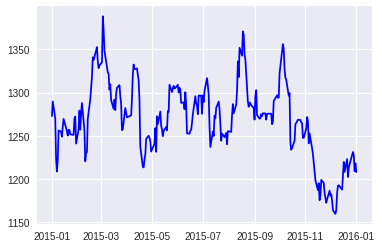

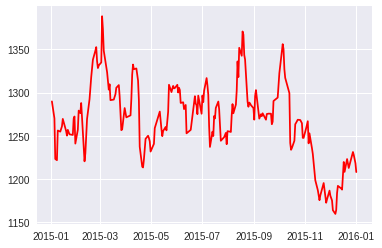

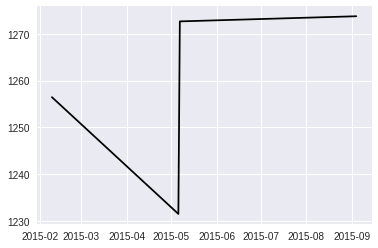

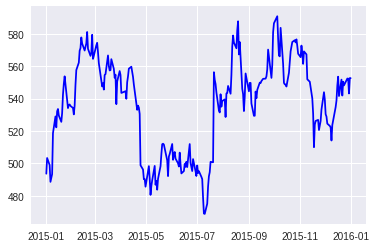

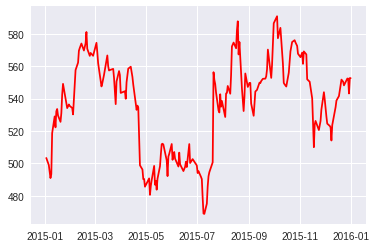

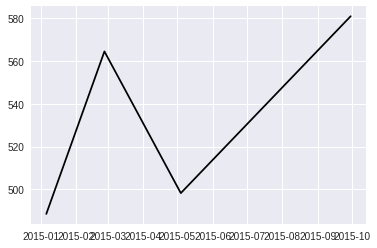

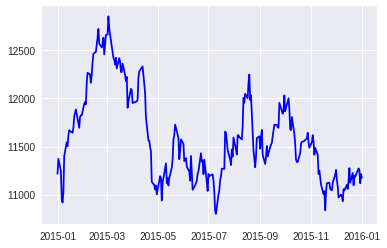

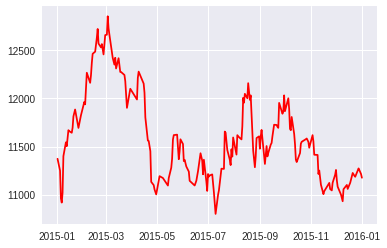

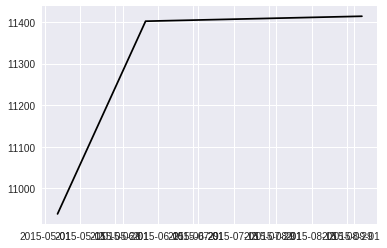

In [50]:
plot_(TCS,N_TCS,Ne_TCS)
plot_(INFY,N_INFY,Ne_INFY)
plot_(niftyit,N_NIFTYIT,Ne_NIFTYIT)

4.Hand craft partial autocorrelation plot for each stock/index on upto all lookbacks on bokeh

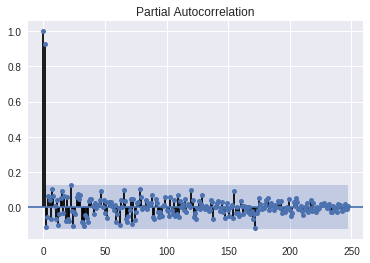

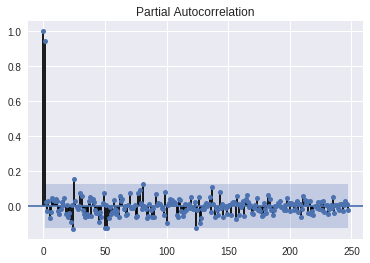

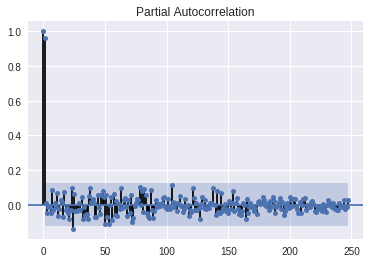

In [51]:
#Partial Auto-correlation Plotting for TCS, Infosys stocks and NIFTYIT index

from statsmodels.graphics.tsaplots import plot_pacf
def plot_partial_correlation(data):
    plot_pacf(data['Close'], lags=247)
    plt.show()

plot_partial_correlation(TCS)
plot_partial_correlation(INFY)
plot_partial_correlation(niftyit)

# Regression Models

### Feature Engineering:

Training and Testing Data set is Prepared for TCS, INFY(INFOSYS) and NIFTYIT 

Training and Testing Data sets with Lag by 1 shift and 2 shift, is prepared for Proper Regression Analysis

In [0]:
#Application of Regression Model, I have decide to use panda library and shift model data 1 and 2 units
#The approach that Closing Price data regress with itself, only Closing prices are selected for traindata

Y_train_tcs = TCS.Close
Y_train_infy = INFY.Close
Y_train_niftyit = niftyit.Close

In [0]:
#Training Data set are shifted by 1 and 2 units, for all 3 data sets
# Thus, total data set now is 2 for all three cases

X_train_tcs1 = Y_train_tcs.shift(periods = 1)
X_train_tcs2 = Y_train_tcs.shift(periods = 2)
X_train_infy1 = Y_train_infy.shift(periods = 1)
X_train_infy2 = Y_train_infy.shift(periods = 2)
X_train_niftyit1 = Y_train_niftyit.shift(periods = 1)
X_train_niftyit2 = Y_train_niftyit.shift(periods = 2)

In [0]:
#dropping NAN values from the training data_Set, which are 1 or 2 order shifted

X_train_tcs1 = X_train_tcs1.dropna()
X_train_tcs2 = X_train_tcs2.dropna()
X_train_infy1 = X_train_infy1.dropna()
X_train_infy2 = X_train_infy2.dropna()
X_train_niftyit1 = X_train_niftyit1.dropna()
X_train_niftyit2 = X_train_niftyit2.dropna()

In [0]:
#Removal of date from index and Column named data from all three stocks/index
#For Y data set

Y_train_tcs = Y_train_tcs.reset_index()
Y_train_tcs = Y_train_tcs.drop(columns = ['Date'])

In [0]:
Y_train_infy = Y_train_infy.reset_index()
Y_train_infy = Y_train_infy.drop(columns = ['Date'])
Y_train_niftyit = Y_train_niftyit.reset_index()
Y_train_niftyit = Y_train_niftyit.drop(columns = ['Date'])

In [0]:
#traing dataset for condition 1 and 2, here one has shift =1 and 2 has shift = 2
#Removal of date from index and Column named data from all three stocks/index for training data set
#For X data set

X_train_tcs1 = X_train_tcs1.reset_index()
X_train_tcs1 = X_train_tcs1.drop(columns = ['Date'])
X_train_tcs2 = X_train_tcs2.reset_index()
X_train_tcs2 = X_train_tcs2.drop(columns = ['Date'])
X_train_infy1 = X_train_infy1.reset_index()
X_train_infy1 = X_train_infy1.drop(columns = ['Date'])
X_train_infy2 = X_train_infy2.reset_index()
X_train_infy2 = X_train_infy2.drop(columns = ['Date'])
X_train_niftyit1 = X_train_niftyit1.reset_index()
X_train_niftyit1 = X_train_niftyit1.drop(columns = ['Date'])
X_train_niftyit2 = X_train_niftyit2.reset_index()
X_train_niftyit2 = X_train_niftyit2.drop(columns = ['Date'])

In [0]:
#Removal of first and second row from 'Y' dataset, for application of Regression models

Y_train_tcs1 =Y_train_tcs.iloc[1:]
Y_train_tcs2 = Y_train_tcs1.iloc[1:]
Y_train_infy1 = Y_train_infy.iloc[1:]
Y_train_infy2 = Y_train_infy1.iloc[1:]
Y_train_niftyit1 = Y_train_niftyit.iloc[1:]
Y_train_niftyit2 = Y_train_niftyit1.iloc[1:]

In [0]:
#Building of training and testing data set, with last 50 'Closing Price Value' in test
#And first 196, 195, 198 or 197 data sets for 'Y' series


Y_tcs_test1 = Y_train_tcs1.tail(50)
Y_tcs_train1 = Y_train_tcs1[:-50]
Y_infy_test1 = Y_train_infy1.tail(50)
Y_infy_train1 = Y_train_infy1[:-50]
Y_niftyit_test1 = Y_train_niftyit1.tail(50)
Y_niftyit_train1 = Y_train_niftyit1[:-50]
Y_tcs_test2 = Y_train_tcs2.tail(50)
Y_tcs_train2 = Y_train_tcs2[:-50]
Y_infy_test2 = Y_train_infy2.tail(50)
Y_infy_train2 = Y_train_infy2[:-50]
Y_niftyit_test2 = Y_train_niftyit2.tail(50)
Y_niftyit_train2 = Y_train_niftyit2[:-50]

In [0]:
X_tcs_train1_2 = X_train_tcs1.iloc[1:]
X_infy_train1_2 = X_train_infy1.iloc[1:]
X_niftyit_train1_2 = X_train_niftyit1.iloc[1:]

In [0]:
#Building of training and testing data set, with last 50 'Closing Price Value' in test
#And first 196, 195, 198 or 197 data sets for 'X' series

X_tcs_test1 = X_train_tcs1.tail(50)
X_tcs_train1 = X_train_tcs1[:-50]
X_tcs_test2 = X_train_tcs2.tail(50)
X_tcs_train2 = X_train_tcs2[:-50]
X_infy_test1 = X_train_infy1.tail(50)
X_infy_train1 = X_train_infy1[:-50]
X_infy_test2 = X_train_infy2.tail(50)
X_infy_train2 = X_train_infy2[:-50]
X_niftyit_test1 = X_train_niftyit1.tail(50)
X_niftyit_train1 = X_train_niftyit1[:-50]
X_niftyit_test2 = X_train_niftyit2.tail(50)
X_niftyit_train2 = X_train_niftyit2[:-50]

X_tcs_test1_2 = X_tcs_train1_2.tail(50)
X_tcs_train1_2 = X_tcs_train1_2[:-50]
X_infy_test1_2 = X_infy_train1_2.tail(50)
X_infy_train1_2 = X_infy_train1_2[:-50]
X_niftyit_test1_2 = X_niftyit_train1_2.tail(50)
X_niftyit_train1_2 = X_niftyit_train1_2[:-50]

### Linear Regression Model with Graph 

0.7958038016416576


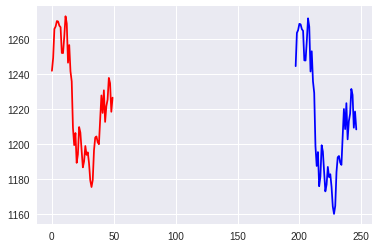

0.3938343273893439


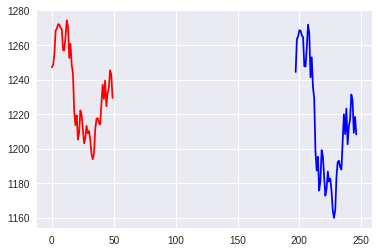

0.8389705404759487


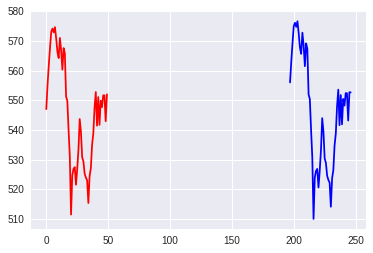

0.7006379068912361


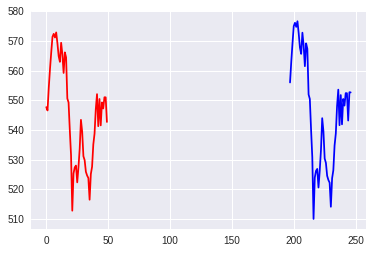

0.8049774822846956


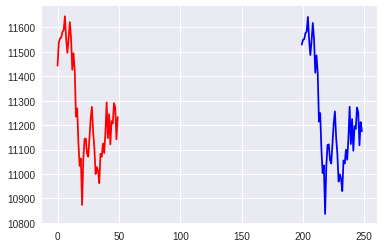

0.6655218169313472


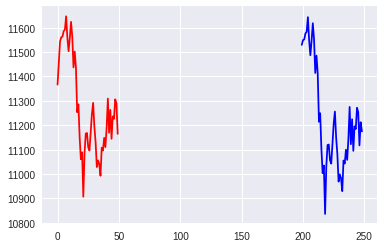

In [62]:
#Application of Linear Regression Model on training and test data sets for 'X' and 'Y'
from sklearn import linear_model
def regression_Model(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LinearRegression()
    reg.fit(data_train_x,data_train_y)
    print(reg.score(data_test_x,data_test_y))
    plt.plot(reg.predict(data_test_x), color = 'red')
    plt.plot(data_test_y, color = 'blue')
    plt.show()

regression_Model(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
regression_Model(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
regression_Model(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
regression_Model(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
regression_Model(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
regression_Model(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

### Checking the Closing Price Datasets With SVM Model

Obtained R^2 is -ve, thus SVM Model is not appropriate in this situation

In [63]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
def SVM_reg(data_train_x,data_train_y,data_test_x,data_test_y):
    svr_poly = SVR()
    svr_poly.fit(data_train_x,data_train_y)
    y_predict = svr_poly.predict(data_test_x)
    print(r2_score(data_test_y, y_predict))
    #print y_ploy
SVM_reg(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)

-3.7877538209787867


### Lasso Regression Model (alpha = .0001) with Predicted-y Graph

0.7957528617062084
0.7957528617062084


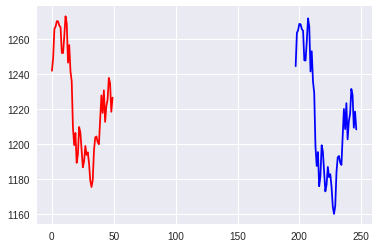

0.393722513115246
0.393722513115246


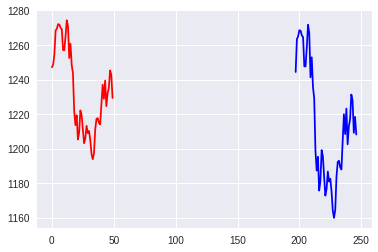

0.8389715567142206
0.8389715567142206


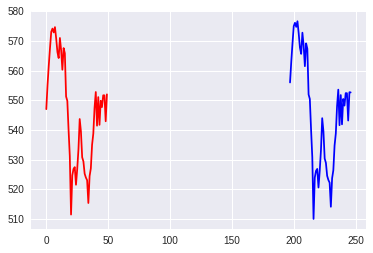

0.7006399618201993
0.7006399618201993


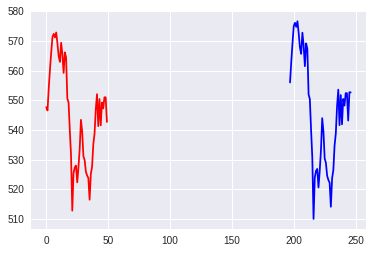

0.8049763861222825
0.8049763861222825


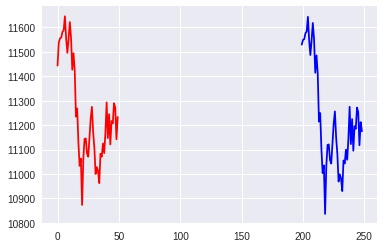

0.6655196810790935
0.6655196810790935


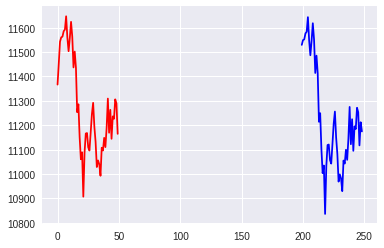

In [64]:
#Application of Lasso Regression Model on training and test data sets for 'X' and 'Y'

#from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
def lsso_reg(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LassoLars(alpha=0.0001)
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    print(reg.score(data_test_x,data_test_y))
    print(r2_score(data_test_y, y_pred))
    #error = y_pred-data_test_y
    plt.plot(reg.predict(data_test_x), color = 'red')
    plt.plot(data_test_y, color = 'blue')
    plt.show()
    #return (error)

Error_tcs_1 = lsso_reg(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
Error_tcs_2 = lsso_reg(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
Error_infy_1 = lsso_reg(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
Error_infy_2 = lsso_reg(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
Error_niftyit_1 = lsso_reg(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
Error_niftyit_2 = lsso_reg(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

# Checking for assumptions

### 1. Lasso Regression:

In [65]:
'''Prove your model doesnot void assumptions'''
import math
from sklearn.metrics import mean_squared_error
def lsso_reg_check(data_train_x,data_train_y,data_test_x,data_test_y):
    #error
    reg = linear_model.LassoLars(alpha=0.0001)
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    rms = np.sqrt(mean_squared_error(data_test_y, y_pred))
    print("RMS error values = ", rms)
   
lsso_reg_check(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
lsso_reg_check(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
lsso_reg_check(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
lsso_reg_check(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
lsso_reg_check(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
lsso_reg_check(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

RMS error values =  14.999548883167524
RMS error values =  25.842583510725763
RMS error values =  7.408998963673303
RMS error values =  10.101948486704698
RMS error values =  93.47566884181118
RMS error values =  122.41658660595675


### 2. Linear Regression Model:

In [66]:
def regression_Model_check(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LinearRegression()
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    rms = np.sqrt(mean_squared_error(data_test_y, y_pred))
    print("RMS error values = ", rms)
    

regression_Model_check(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
regression_Model_check(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
regression_Model_check(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
regression_Model_check(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
regression_Model_check(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
regression_Model_check(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

RMS error values =  14.997678297109386
RMS error values =  25.840200358604882
RMS error values =  7.40902234245121
RMS error values =  10.10198315858514
RMS error values =  93.47540614372897
RMS error values =  122.41619575461962


The Root Mean Square Error for Each case is at acceptable range

# Checking for Normality Distributions for different Models

### 1. Histogram, variance and Jarque_Bera test of Residuals for lasso regression model 

Variance =  144.17546969729804
jarque_bera_Normality =  (1.774302424775233, 0.4118272917142707)


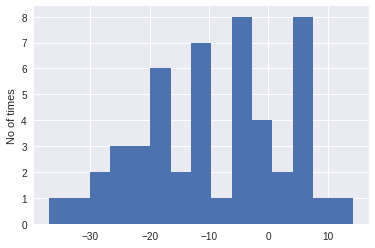

Variance =  290.61331597836056
jarque_bera_Normality =  (0.9497797661545377, 0.6219535403042761)


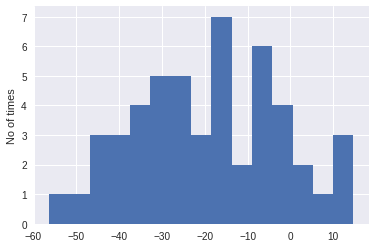

Variance =  54.631257721401106
jarque_bera_Normality =  (2.599032287317187, 0.27266369117761036)


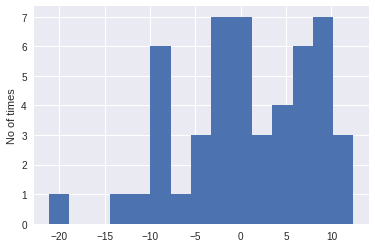

Variance =  101.11954386777899
jarque_bera_Normality =  (2.8186342706179945, 0.2443100569165244)


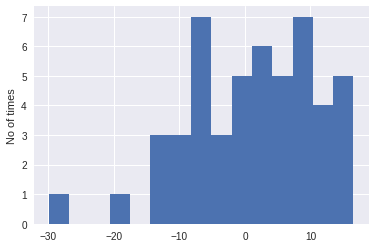

Variance =  8122.774938987248
jarque_bera_Normality =  (1.9456666594679142, 0.37801049101718953)


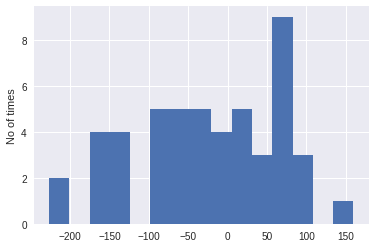

Variance =  12964.513211466196
jarque_bera_Normality =  (0.36346937003732693, 0.8338225366818539)


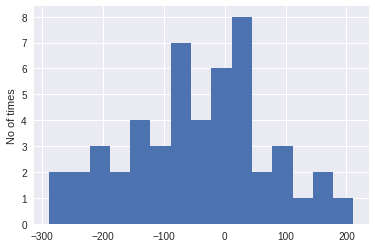

In [67]:
def histo(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LassoLars(alpha=0.001)
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    residual = np.asarray(data_test_y.T)-np.asarray(y_pred.T)
    residual = residual[0]
    v = np.var(residual)
    print("Variance = ", v)
    print("jarque_bera_Normality = ", stats.jarque_bera(residual));
    

    plt.hist(residual, bins=15)
    plt.ylabel('No of times')
    plt.show()

histo(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
histo(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
histo(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
histo(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
histo(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
histo(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

The Graph in the Above is acquiring Bell Shape (Normal Distribution), my Regression Model is accurate

### 3.Histogram, variance and Jarque_Bera test of Residuals for Linear Regression Model


Variance =  144.12234237009787
jarque_bera_Normality =  (1.7737488668760821, 0.4119412926152749)


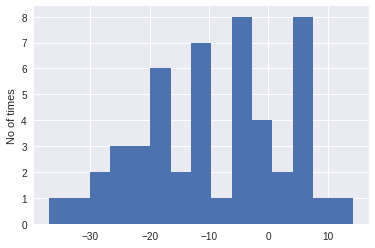

Variance =  290.4786691141025
jarque_bera_Normality =  (0.948847644248894, 0.6222434761225148)


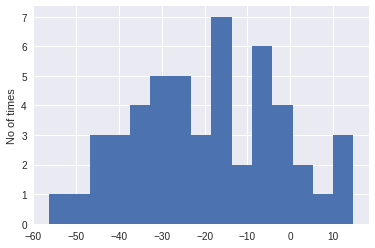

Variance =  54.640709273913316
jarque_bera_Normality =  (2.591534829586445, 0.27368775169061155)


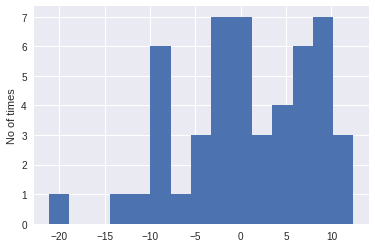

Variance =  101.13792393727265
jarque_bera_Normality =  (2.8139173031899554, 0.2448869382221095)


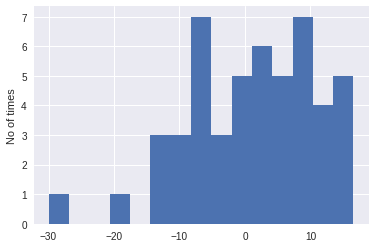

Variance =  8122.933175671165
jarque_bera_Normality =  (1.945356914173103, 0.3780690390363065)


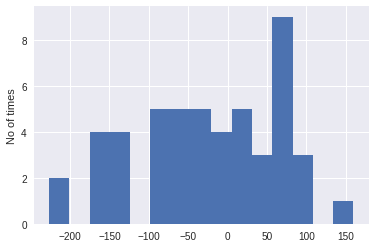

Variance =  12964.727134453788
jarque_bera_Normality =  (0.3633355703638072, 0.8338783211394094)


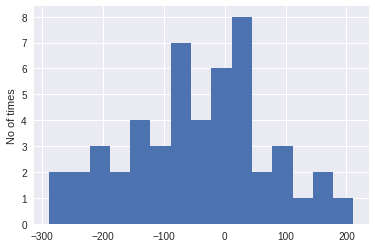

In [68]:
def histo(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LinearRegression()
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    residual = np.asarray(data_test_y.T)-np.asarray(y_pred.T)
    residual = residual[0]
    v = np.var(residual)
    print("Variance = ", v)
    print("jarque_bera_Normality = ", stats.jarque_bera(residual))
    plt.hist(residual, bins=15)
    plt.ylabel('No of times')
    plt.show()

histo(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
histo(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
histo(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
histo(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
histo(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
histo(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

In [69]:
def lsso_reg_check(data_train_x,data_train_y,data_test_x,data_test_y):
    #error
    reg = linear_model.LassoLars(alpha=0.0001)
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    rms = np.sqrt(mean_squared_error(data_test_y, y_pred))
    print("RMS error values = ", rms)
   
lsso_reg_check(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
lsso_reg_check(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
lsso_reg_check(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
lsso_reg_check(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
lsso_reg_check(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
lsso_reg_check(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

RMS error values =  14.999548883167524
RMS error values =  25.842583510725763
RMS error values =  7.408998963673303
RMS error values =  10.101948486704698
RMS error values =  93.47566884181118
RMS error values =  122.41658660595675


## 2.Scatter Plot of Residual and y_pred for Lasso Regression

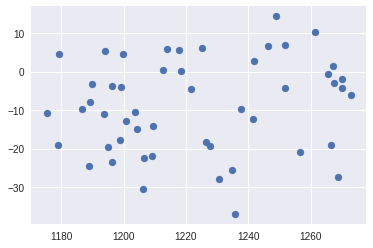

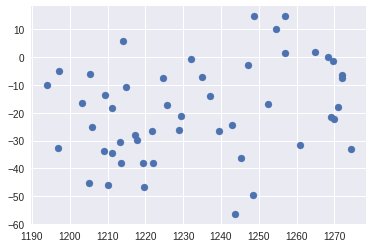

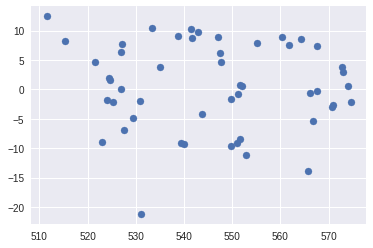

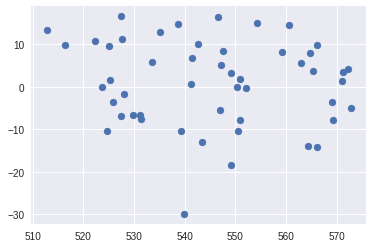

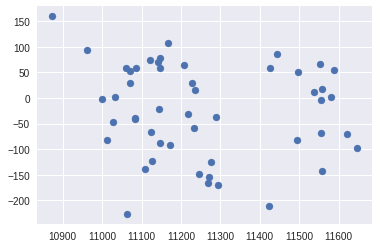

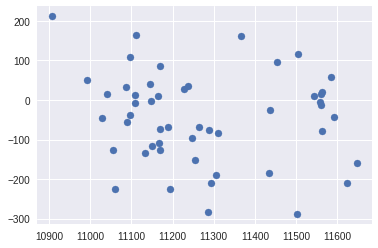

In [70]:
def lsso_reg_check(data_train_x,data_train_y,data_test_x,data_test_y):
    #error
    reg = linear_model.LassoLars(alpha=0.0001)
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    residual = np.asarray(data_test_y.T)-np.asarray(y_pred.T)
    residual = residual[0]
    plt.scatter(y_pred,residual)
    plt.show()

   
lsso_reg_check(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
lsso_reg_check(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
lsso_reg_check(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
lsso_reg_check(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
lsso_reg_check(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
lsso_reg_check(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

Since, we donot find any specific pattern in any of above graph. So, we can conclude the errors are normal

## 1. Scatter Plot of Residual and y_pred for Linear Regression

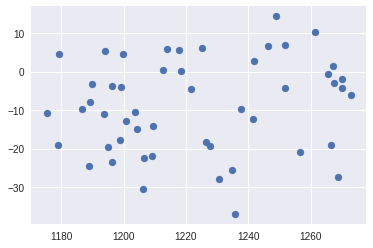

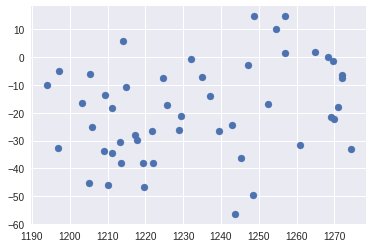

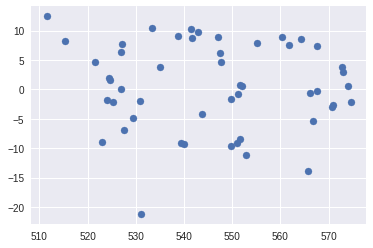

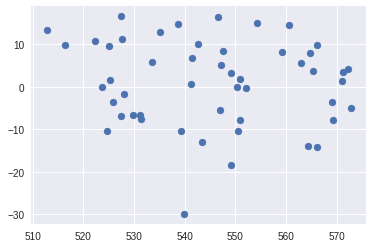

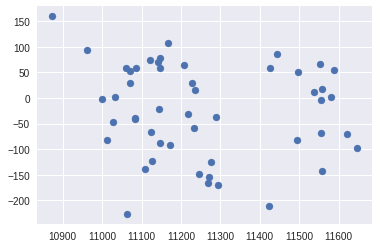

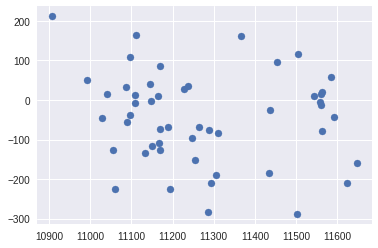

In [71]:
def regression_Model_check(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LinearRegression()
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    residual = np.asarray(data_test_y.T)-np.asarray(y_pred.T)
    residual = residual[0]
    plt.scatter(y_pred,residual)
    plt.show()
    
    

regression_Model_check(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
regression_Model_check(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
regression_Model_check(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
regression_Model_check(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
regression_Model_check(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
regression_Model_check(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

Since, we donot find any specific pattern in any of above graph. So, we can conclude the errors are normal

### Checking Correlation Between  y_(t-1) and y_(t-2)

Corelation [[1.         0.86774245]
 [0.86774245 1.        ]]


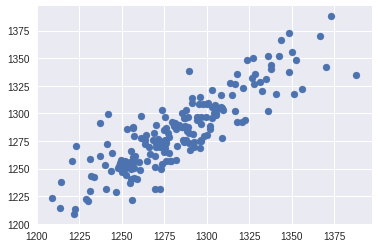

In [72]:
x = np.asarray(X_tcs_train1_2.T)
y = np.asarray(X_tcs_train2.T)
print("Corelation", np.corrcoef(x,y))
plt.scatter(x,y);

This correlation is 0.86774245, a strong positive correlation between Y_(t-1) and Y_(t-2)

### Correlation Matix between here shows almost no Correlation between Y_(t-1) and Residual, Y_(t-2) and Residual. Thus Satisfying the assumption for Linear Regression Model

In [73]:
def regression_Model_check(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LinearRegression()
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    residual = np.asarray(data_test_y.T)-np.asarray(y_pred.T)
    residual = residual[0]
    y = np.asarray(data_test_x.T)
    y = y[0]
    print("Corelation", np.corrcoef(residual,y))
    
    

regression_Model_check(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
regression_Model_check(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
regression_Model_check(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
regression_Model_check(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
regression_Model_check(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
regression_Model_check(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

Corelation [[1.         0.15906049]
 [0.15906049 1.        ]]
Corelation [[1.         0.28359945]
 [0.28359945 1.        ]]
Corelation [[ 1.        -0.0756607]
 [-0.0756607  1.       ]]
Corelation [[ 1.         -0.10833915]
 [-0.10833915  1.        ]]
Corelation [[ 1.         -0.13764769]
 [-0.13764769  1.        ]]
Corelation [[ 1.         -0.14753477]
 [-0.14753477  1.        ]]


### Correlation Matix between here shows almost no Correlation between Y_(t-1) and Residual, Y_(t-2) and Residual. Thus Satisfying our assumption for Lasso Regression Model

In [74]:
def lasso_Model_check(data_train_x,data_train_y,data_test_x,data_test_y):
    reg = linear_model.LassoLars(alpha=0.0001)
    reg.fit(data_train_x,data_train_y)
    y_pred = reg.predict(data_test_x)
    residual = np.asarray(data_test_y.T)-np.asarray(y_pred.T)
    residual = residual[0]
    y = np.asarray(data_test_x.T)
    y = y[0]
    print("Corelation", np.corrcoef(residual,y))
    
    

lasso_Model_check(X_tcs_train1,Y_tcs_train1,X_tcs_test1,Y_tcs_test1)
lasso_Model_check(X_tcs_train2,Y_tcs_train2,X_tcs_test2,Y_tcs_test2)
lasso_Model_check(X_infy_train1,Y_infy_train1,X_infy_test1,Y_infy_test1)
lasso_Model_check(X_infy_train2,Y_infy_train2,X_infy_test2,Y_infy_test2)
lasso_Model_check(X_niftyit_train1,Y_niftyit_train1,X_niftyit_test1,Y_niftyit_test1)
lasso_Model_check(X_niftyit_train2,Y_niftyit_train2,X_niftyit_test2,Y_niftyit_test2)

Corelation [[1.         0.15917302]
 [0.15917302 1.        ]]
Corelation [[1.         0.28367449]
 [0.28367449 1.        ]]
Corelation [[ 1.         -0.07554617]
 [-0.07554617  1.        ]]
Corelation [[ 1.         -0.10825594]
 [-0.10825594  1.        ]]
Corelation [[ 1.         -0.13764075]
 [-0.13764075  1.        ]]
Corelation [[ 1.        -0.1475293]
 [-0.1475293  1.       ]]
